# A4 notebook
Building from the previous notebook (A3), I chose to go for the processing of a Sentinel-2 image in the TIFF format to extract meaningful information instead of plain imagery and prepare it for analysis using functions defined in the `geoprocessing_functions.py` file.

I developed these functions to get more familiar with the `rasterio` library and to understand how to manipulate raster data in Python, in order to prepare for the final project.

In [16]:
# Load the TIFF file
from geoprocessing_functions import extract_geo_metadata, load_satellite_data, preprocess_for_models

# The chosen TIFF file is a Sentinel-2A subset with bands ToA_BGRNirSWIR1SWIR2
# The bands correspond to: 1: Blue, 2: Green, 3: Red, 4: NIR, 5: SWIR1, 6: SWIR2
data = load_satellite_data('Sentinel2A_subset_bands_ToA_BGRNirSWIR1SWIR2.tif', bands=[1, 2, 3, 4, 5, 6])
print(data['data'].shape)  # Should print (6, height, width)

torch.Size([6, 1288, 1320])


In [35]:
# Extract metadata
metadata = extract_geo_metadata(data)
print(f"Image covers {metadata['area_km2']:.2f} km²")
print(f"Center coordinates: {metadata['center_lat']:.4f}, {metadata['center_lon']:.4f}")
print(f"Pixel resolution: {metadata['pixel_size_x']:.2f} m, {metadata['pixel_size_y']:.2f} m")
print(f"Shape: {metadata['shape']}")

Image covers 170.02 km²
Center coordinates: 5299345.8567, 379523.6997
Pixel resolution: 10.00 m, 10.00 m
Shape: torch.Size([6, 1288, 1320])


In [ ]:
# Define model requirements
# Example model configuration for Sentinel-2A data
# This configuration is based on common practices for pre-trained models

SENTINEL2_MODELS_CONFIG = {
    # ResNet-based models for RGB images classification
    # The input size is typically 224x224 for many pre-trained models
    # The bands are set to 3 for RGB, and normalization is based on ImageNet
    # Reference : https://torchgeo.readthedocs.io/en/stable/_modules/torchgeo/models/resnet.html
    'resnet50_rgb': {
        'input_size': (224, 224),
        'bands': 3,
        'normalize': {
            'mean': [0.485, 0.456, 0.406],  # ImageNet means
            'std': [0.229, 0.224, 0.225]    # ImageNet stds
        }
    },
    # ResNet-based models for multispectral images classification
    # The input size is typically 224x224 for many pre-trained models
    # The bands are set to 6 for multispectral, and normalization is based on Sentinel-2
    # Reference : https://torchgeo.readthedocs.io/en/stable/_modules/torchgeo/models/resnet.html
    'resnet50_multispectral': {
        'input_size': (224, 224),
        'bands': 6,  # All available bands
        'normalize': {
            'mean': [0.1, 0.1, 0.1, 0.3, 0.2, 0.1],  # Sentinel-2 typical values
            'std': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
        }
    },
}

preprocessed = preprocess_for_models(data, SENTINEL2_MODELS_CONFIG)
print(preprocessed["resnet50_rgb"].shape)  # Should print (3, 224, 224)
print(preprocessed["resnet50_multispectral"].shape)  # Should print (6, 224, 224)

torch.Size([3, 224, 224])
torch.Size([6, 224, 224])


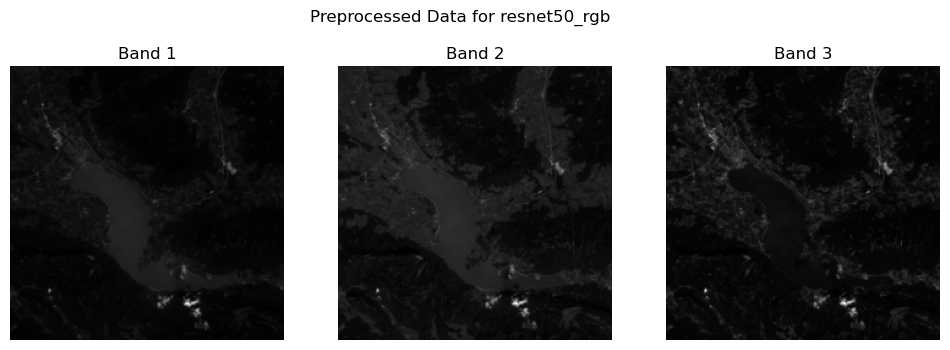

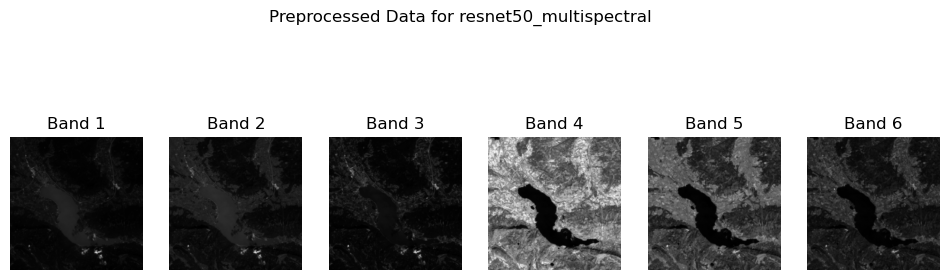

In [44]:
#Visualize the preprocessed data
import matplotlib.pyplot as plt
def visualize_preprocessed_data(preprocessed_data, model_name):
    plt.figure(figsize=(12, 4))
    for i in range(preprocessed_data[model_name].shape[0]):
        plt.subplot(1, preprocessed_data[model_name].shape[0], i + 1)
        plt.imshow(preprocessed_data[model_name][i], cmap='gray')
        plt.title(f'Band {i + 1}')
        plt.axis('off')
    plt.suptitle(f'Preprocessed Data for {model_name}')
    plt.show()
visualize_preprocessed_data(preprocessed, 'resnet50_rgb')
visualize_preprocessed_data(preprocessed, 'resnet50_multispectral')